In [3]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import lightkurve as lk
import triceratops.triceratops as tr
import triceratops.get_apertures as ga

# Running TRICERATOPS+ on a false positive

This notebook illustrates how to apply the code on a planet candidate that turns out to be a false positive. Be sure to check the TOI-4155 example first, which has more detailed comments 

# TRICERATOPS+ Extension

## Overview

TRICERATOPS+ extends the functionality of the original TRICERATOPS package with enhanced capabilities for incorporating ground-based light curves into the analysis pipeline.

## Key Differences

The primary enhancement is in the `.calc_probs()` function, which now supports two additional arguments:

1. `external_lc_files`: A list of file paths (as strings) pointing to ground-based light curve data
2. `filt_lcs`: A list of strings specifying the photometric filters used for each light curve

## File Format Requirements

TRICERATOPS+ expects ground-based light curve files to be in `.txt` format with three columns:

| Column | Content | Notes |
|--------|---------|-------|
| 1 | Time from mid-transit (days) | No column header |
| 2 | Relative flux values | No column header |
| 3 | Relative flux error values | No column header |

## Supported Filters

The `filt_lcs` argument accepts the following photometric filter designations:

- `"g"` - SDSS g-band
- `"r"` - SDSS r-band
- `"i"` - SDSS i-band
- `"z"` - SDSS z-band
- `"J"` - NIR J-band
- `"H"` - NIR H-band
- `"K"` - NIR K-band

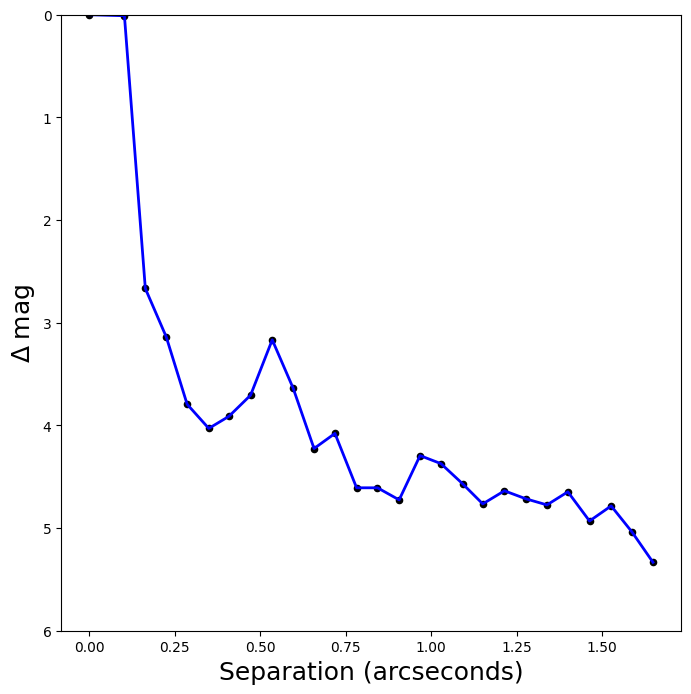

In [52]:
contrastcurve_file = "./TOI4051_01_contrast_curve.csv"
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

fig = plt.figure(figsize=(8, 8))
plt.scatter(sep, dmag, s=20, c='black')
plt.plot(sep, dmag, lw=2, c='blue')
plt.ylim(6,0)
plt.ylabel(r"$\mathrm{\Delta \; mag}$", fontsize=18);
plt.xlabel("Separation (arcseconds)", fontsize=18);

In [8]:
ID = 237101326
trilegal_fname = None

In [9]:
lk.search_lightcurve(f'TIC {ID}', mission='TESS', author='SPOC')

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 47,2021,SPOC,120,237101326,0.0
1,TESS Sector 59,2022,SPOC,120,237101326,0.0
2,TESS Sector 57,2022,SPOC,120,237101326,0.0
3,TESS Sector 56,2022,SPOC,120,237101326,0.0
4,TESS Sector 55,2022,SPOC,120,237101326,0.0
5,TESS Sector 54,2022,SPOC,120,237101326,0.0
...,...,...,...,...,...,...
17,TESS Sector 77,2024,SPOC,120,237101326,0.0
18,TESS Sector 78,2024,SPOC,120,237101326,0.0


In [10]:
%%time
sectors = np.array([47, 59, 74])
target = tr.target(ID=ID, sectors=sectors, trilegal_fname = trilegal_fname)

CPU times: user 6.64 s, sys: 3.43 s, total: 10.1 s
Wall time: 1min 2s


In [11]:
# this only works for SPOC data (not for QLP yet!)
aps = []
for sector in sectors:
    ap = ga.get_aperture(ID, sector)
    aps.append(ap)

Sector 47


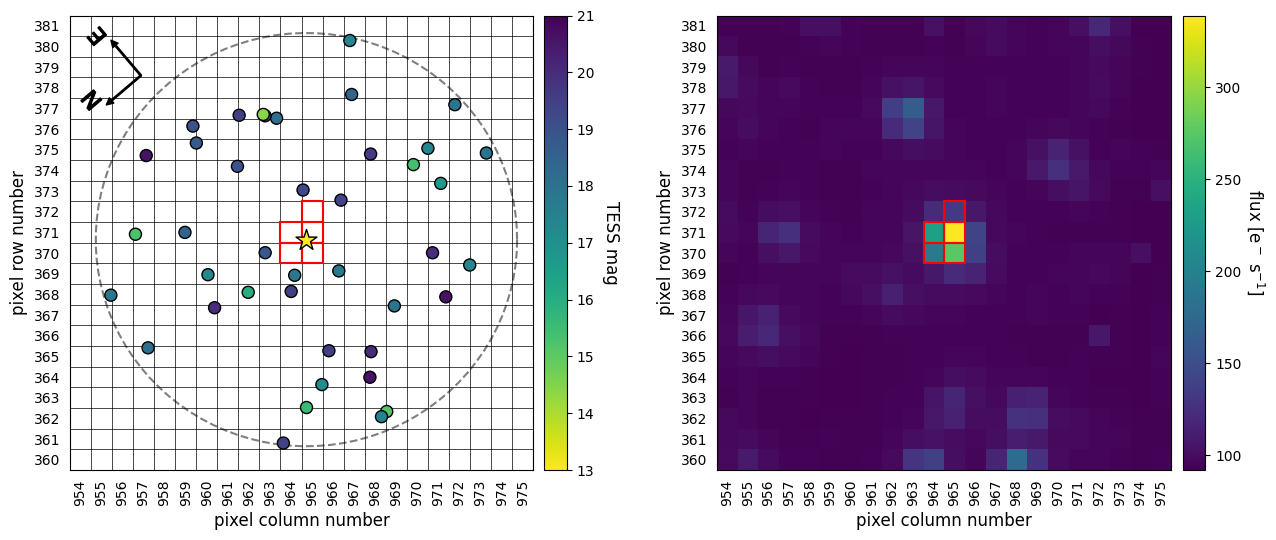

Sector 59


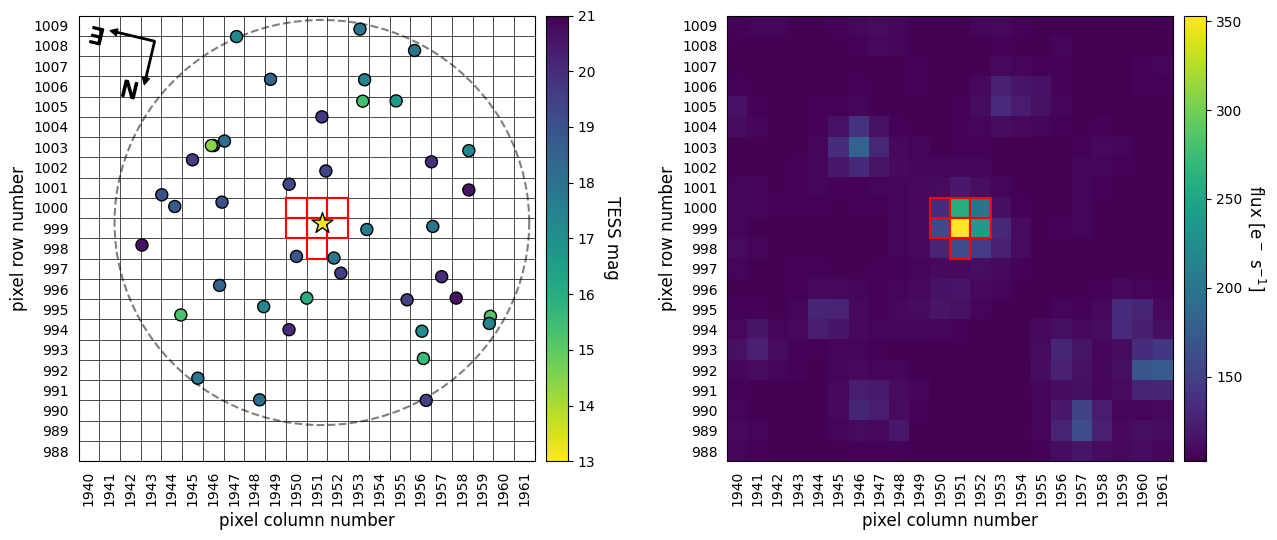

Sector 74


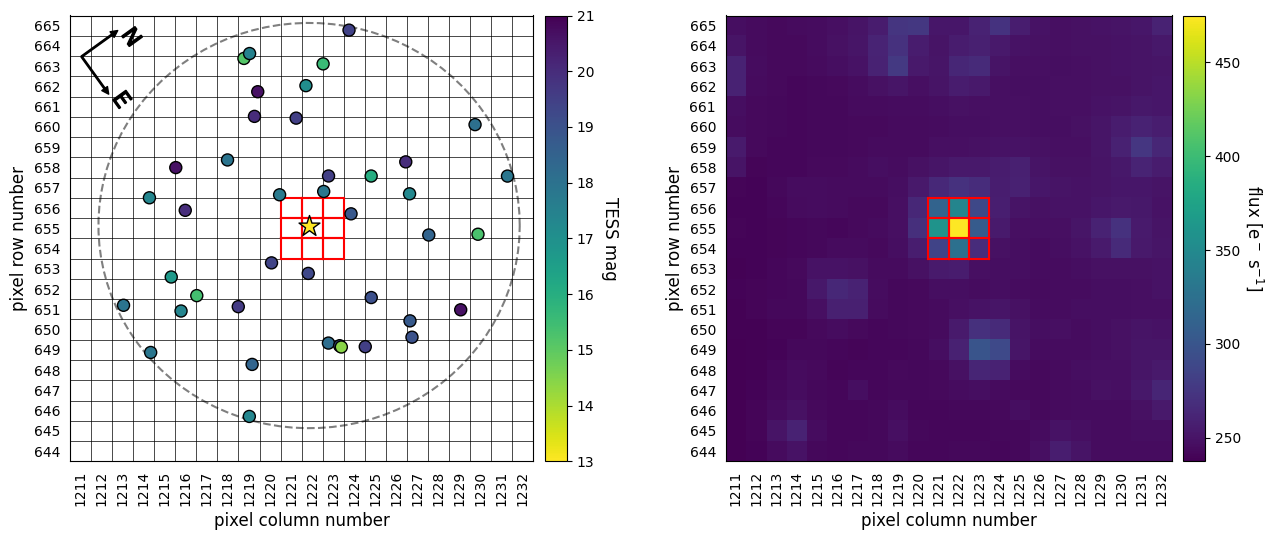

,ID,Bmag,Vmag,Tmag,Jmag,Hmag,Kmag,gmag,rmag,imag,zmag,ra,dec,mass,rad,Teff,d,plx,sep (arcsec),PA (E of N)
0,237101326,14.812,13.8070,13.0273,12.214,11.769,11.663,NaN,NaN,NaN,NaN,240.691844,71.224317,0.850000,1.003030,5091.0,441.274,2.237610,0.000,0.000
1,237101325,NaN,NaN,17.8126,16.117,15.150,15.029,NaN,NaN,NaN,NaN,240.675210,71.232955,0.205027,0.235205,3200.0,289.445,3.451940,36.583,328.224
2,1201304211,NaN,20.3029,18.8159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.704791,71.235281,0.620000,0.482921,3982.0,1710.080,0.154092,42.226,20.798
3,1201304210,NaN,18.7532,17.7270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.655289,71.222877,0.720000,0.490861,4585.0,1491.990,0.600849,42.675,263.045
4,1201304017,NaN,21.0726,19.2663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.725125,71.216450,NaN,NaN,NaN,1147.650,0.657329,47.851,126.271
5,1201304016,NaN,21.4847,19.4018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.699143,71.210195,NaN,NaN,3615.0,994.737,0.891602,51.537,170.548
6,1201304212,NaN,21.3154,19.5028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.666736,71.236490,NaN,NaN,NaN,780.908,1.323330,52.596,326.442
7,237101322,17.056,16.6020,16.0197,15.371,15.168,15.066,NaN,NaN,NaN,NaN,240.688314,71.245708,1.200000,1.424910,6227.0,3564.050,0.217250,77.117,356.962
8,1201304021,NaN,20.7597,19.0373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.773975,71.226191,NaN,NaN,3835.0,1178.910,0.700169,95.400,85.905
9,237101320,20.407,19.1423,17.2641,15.869,15.564,14.929,NaN,NaN,NaN,NaN,240.720295,71.251160,0.557043,0.563278,3689.0,855.198,1.141660,102.099,18.811


In [12]:
for i,(sector,aperture) in enumerate(zip(sectors,aps)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture, save=False)

target.stars

In [22]:
target.update_star(ID = ID, param="Teff", value = 5091) # update properties of target star from followup obs

In [23]:
target.calc_depths(tdepth=2677e-6, all_ap_pixels=aps) # specify the TESS transit depth
target.stars

,ID,Bmag,Vmag,Tmag,Jmag,Hmag,Kmag,gmag,rmag,imag,...,dec,mass,rad,Teff,d,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,237101326,14.812,13.8070,13.0273,12.214,11.769,11.663,NaN,NaN,NaN,...,71.224317,0.850000,1.003030,5091.0,441.274,2.237610,0.000,0.000,9.928519e-01,0.002696
1,237101325,NaN,NaN,17.8126,16.117,15.150,15.029,NaN,NaN,NaN,...,71.232955,0.205027,0.235205,3200.0,289.445,3.451940,36.583,328.224,3.338239e-03,0.801920
2,1201304211,NaN,20.3029,18.8159,NaN,NaN,NaN,NaN,NaN,NaN,...,71.235281,0.620000,0.482921,3982.0,1710.080,0.154092,42.226,20.798,1.136310e-03,0.000000
3,1201304210,NaN,18.7532,17.7270,NaN,NaN,NaN,NaN,NaN,NaN,...,71.222877,0.720000,0.490861,4585.0,1491.990,0.600849,42.675,263.045,1.694696e-03,0.000000
4,1201304017,NaN,21.0726,19.2663,NaN,NaN,NaN,NaN,NaN,NaN,...,71.216450,NaN,NaN,NaN,1147.650,0.657329,47.851,126.271,4.831556e-04,0.000000
5,1201304016,NaN,21.4847,19.4018,NaN,NaN,NaN,NaN,NaN,NaN,...,71.210195,NaN,NaN,3615.0,994.737,0.891602,51.537,170.548,2.271860e-04,0.000000
6,1201304212,NaN,21.3154,19.5028,NaN,NaN,NaN,NaN,NaN,NaN,...,71.236490,NaN,NaN,NaN,780.908,1.323330,52.596,326.442,1.268639e-04,0.000000
7,237101322,17.056,16.6020,16.0197,15.371,15.168,15.066,NaN,NaN,NaN,...,71.245708,1.200000,1.424910,6227.0,3564.050,0.217250,77.117,356.962,1.412513e-04,0.000000
8,1201304021,NaN,20.7597,19.0373,NaN,NaN,NaN,NaN,NaN,NaN,...,71.226191,NaN,NaN,3835.0,1178.910,0.700169,95.400,85.905,3.332101e-07,0.000000
9,237101320,20.407,19.1423,17.2641,15.869,15.564,14.929,NaN,NaN,NaN,...,71.251160,0.557043,0.563278,3689.0,855.198,1.141660,102.099,18.811,7.075650e-08,0.000000


In [24]:
TESS_data = np.loadtxt('./TOI4051_01_TESS_lightcurve.txt')

time = TESS_data[:,0]
flux = TESS_data[:,1]
flux_err = TESS_data[:,2]
tess_texp = np.min(np.diff(time))

nans = np.where(np.isnan(time))[0]
time = np.delete(time,nans)
flux = np.delete(flux ,nans)
flux_err = np.delete(flux_err,nans)

In [34]:
i_lightcurve_file = "./TOI4051_01_i_lightcurve.txt"

i_lightcurve = np.loadtxt(i_lightcurve_file)
time_i = i_lightcurve[:,0]
flux_i = i_lightcurve[:,1]
flux_err_i = i_lightcurve[:,2]

In [36]:
j_lightcurve_file = "./TOI4051_01_J_lightcurve.txt"

j_lightcurve = np.loadtxt(j_lightcurve_file)
time_j = j_lightcurve[:,0]
flux_j = j_lightcurve[:,1]
flux_err_j = j_lightcurve[:,2]

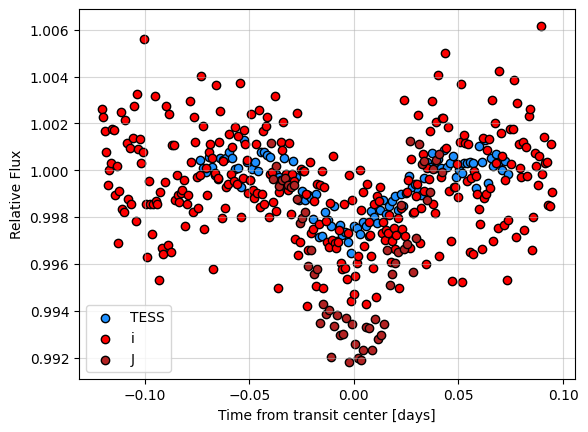

In [45]:
plt.scatter(time, flux, c='dodgerblue', edgecolor='k', label="TESS")
plt.scatter(time_i, flux_i, c='red', edgecolor='k', label="i")
plt.scatter(time_j, flux_j, c='firebrick', edgecolor='k', label="J")
plt.xlabel("Time from transit center [days]")
plt.ylabel("Relative Flux")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [46]:
# stars that could potentialy host the TESS transit but were ruled out by ground-based followup
filtered_ids = target.stars[target.stars["tdepth"] > 0]["ID"]

filtered_ids_list = filtered_ids.astype(str).tolist()

# Keep only the first ID and remove the rest
ids_to_remove = filtered_ids_list[1:]  # All except the first element

# Create numpy array from the list of IDs to remove
filtered_ids_array = np.array(ids_to_remove)

# Use it with your function
target.remove_star(drop_stars=filtered_ids_array)

,ID,Bmag,Vmag,Tmag,Jmag,Hmag,Kmag,gmag,rmag,imag,...,dec,mass,rad,Teff,d,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,237101326,14.812,13.8070,13.0273,12.214,11.769,11.663,NaN,NaN,NaN,...,71.224317,0.850000,1.003030,5091.0,441.274,2.237610,0.000,0.000,9.928519e-01,0.002696
2,1201304211,NaN,20.3029,18.8159,NaN,NaN,NaN,NaN,NaN,NaN,...,71.235281,0.620000,0.482921,3982.0,1710.080,0.154092,42.226,20.798,1.136310e-03,0.000000
3,1201304210,NaN,18.7532,17.7270,NaN,NaN,NaN,NaN,NaN,NaN,...,71.222877,0.720000,0.490861,4585.0,1491.990,0.600849,42.675,263.045,1.694696e-03,0.000000
4,1201304017,NaN,21.0726,19.2663,NaN,NaN,NaN,NaN,NaN,NaN,...,71.216450,NaN,NaN,NaN,1147.650,0.657329,47.851,126.271,4.831556e-04,0.000000
5,1201304016,NaN,21.4847,19.4018,NaN,NaN,NaN,NaN,NaN,NaN,...,71.210195,NaN,NaN,3615.0,994.737,0.891602,51.537,170.548,2.271860e-04,0.000000
6,1201304212,NaN,21.3154,19.5028,NaN,NaN,NaN,NaN,NaN,NaN,...,71.236490,NaN,NaN,NaN,780.908,1.323330,52.596,326.442,1.268639e-04,0.000000
7,237101322,17.056,16.6020,16.0197,15.371,15.168,15.066,NaN,NaN,NaN,...,71.245708,1.200000,1.424910,6227.0,3564.050,0.217250,77.117,356.962,1.412513e-04,0.000000
8,1201304021,NaN,20.7597,19.0373,NaN,NaN,NaN,NaN,NaN,NaN,...,71.226191,NaN,NaN,3835.0,1178.910,0.700169,95.400,85.905,3.332101e-07,0.000000
9,237101320,20.407,19.1423,17.2641,15.869,15.564,14.929,NaN,NaN,NaN,...,71.251160,0.557043,0.563278,3689.0,855.198,1.141660,102.099,18.811,7.075650e-08,0.000000
10,237101042,20.238,20.4167,17.9354,16.181,15.549,15.352,NaN,NaN,NaN,...,71.217182,NaN,NaN,NaN,NaN,NaN,104.498,255.813,9.919360e-09,0.000000


In [48]:
%%time
P_orb = 1.5373948
drop_scenario = []
target.calc_probs(time=time, flux_0=flux, flux_err_0=np.mean(flux_err), exptime=tess_texp, P_orb=P_orb, 
                  N = 2000000, contrast_curve_file=contrastcurve_file, lnz_const=650,  
                  external_lc_files=[j_lightcurve_file, i_lightcurve_file],
                  filt_lcs = ["J", "i"],
                  drop_scenario=drop_scenario, parallel=True) 

griz mags: nan nan nan nan
Calculating TP scenario probability for 237101326.


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Calculating EB and EBx2P scenario probabilities for 237101326.
Z, Teff, logg: 0.0 5000 4.5
Calculating PTP scenario probability for 237101326.
Calculating PEB and PEBx2P scenario probabilities for 237101326.
Calculating STP scenario probability for 237101326.
Calculating SEB and SEBx2P scenario probabilities for 237101326.
Calculating DTP scenario probability for 237101326.
Using gmag, rmag, imag, zmag:  14.3146175 13.4949 13.229196670094007 13.091726142431884
Calculating DEB and DEBx2P scenario probabilities for 237101326.
Using gmag, rmag, imag, zmag:  14.3146175 13.4949 13.229196670094007 13.091726142431884
Calculating BTP scenario probability for 237101326.
Using gmag, rmag, imag, zmag:  14.3146175 13.4949 13.229196670094007 13.091726142431884
Calculating BEB and BEBx2P scenario probabilities for 237101326.
Using gmag, rmag, imag, zmag:  14.3146175 13.4949 13.229196670094007 13.091726142431884
CPU times: user 44min 41s, sys: 1min 5s, total: 45min 46s
Wall time: 8min 3s


In [50]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 4))
print("NFPP =", np.round(target.NFPP, 4))
df_results

FPP = 1.0
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,...,R_EB,M_comp,R_comp,flux_ratio_comp_T,prob,lnZ,flux_ratio_EB_J_1,flux_ratio_comp_J_1,flux_ratio_EB_i_2,flux_ratio_comp_i_2
0,237101326,TP,0.850000,1.003030,1.537395,82.676971,0.538916,0.464434,182.214841,10.183751,...,0.000000,0.000000,0.000000,0.000000,2.421711e-84,182.084714,0.000000,0.000000,0.000000,0.000000
1,237101326,EB,0.850000,1.003030,1.537395,71.865641,1.681646,0.214345,49.136641,0.000000,...,0.810949,0.000000,0.000000,0.000000,2.010244e-184,-48.360014,0.420376,0.000000,0.377177,0.000000
2,237101326,EBx2P,0.850000,1.003030,3.074790,82.449685,1.292246,0.284307,182.202263,0.000000,...,0.874578,0.000000,0.000000,0.000000,9.196857e-84,183.419101,0.497065,0.000000,0.496562,0.000000
3,237101326,PTP,0.850000,1.003030,1.537395,81.845620,0.682456,0.262333,174.622513,8.121978,...,0.000000,0.135879,0.166010,0.002972,2.094089e-91,165.821262,0.000000,0.006601,0.000000,0.001287
4,237101326,PEB,0.850000,1.003030,1.537395,71.734863,1.703867,0.221763,41.988406,0.000000,...,0.800411,0.820070,0.846457,0.464210,1.615211e-166,-7.132273,0.406077,0.465606,0.352844,0.452746
5,237101326,PEBx2P,0.850000,1.003030,3.074790,82.137305,1.387604,0.215110,182.046488,0.000000,...,0.860018,0.795143,0.822427,0.432061,5.249000e-87,175.950522,0.481298,0.435569,0.476023,0.403260
6,237101326,STP,0.475584,0.475123,1.537395,86.030163,0.467647,0.362590,149.481461,13.069051,...,0.000000,0.850000,1.003030,0.055884,1.054200e-03,367.762414,0.000000,0.110516,0.000000,0.039680
7,237101326,SEB,0.423650,0.423314,1.537395,87.508058,0.402481,0.236463,164.361648,0.000000,...,0.100000,0.850000,1.003030,0.042726,2.027038e-14,343.087771,0.001368,0.090022,0.000519,0.029150
8,237101326,SEBx2P,0.409362,0.410443,3.074790,86.431944,1.262880,0.314091,198.792599,0.000000,...,0.405509,0.850000,1.003030,0.039855,9.989458e-01,374.616332,0.083030,0.084975,0.025707,0.026666
9,237101326,DTP,0.850000,1.003030,1.537395,80.095815,0.873722,0.041061,100.073121,10.019647,...,0.000000,2.181000,0.000000,0.431652,1.467957e-68,218.425472,0.000000,0.290598,0.000000,0.398768


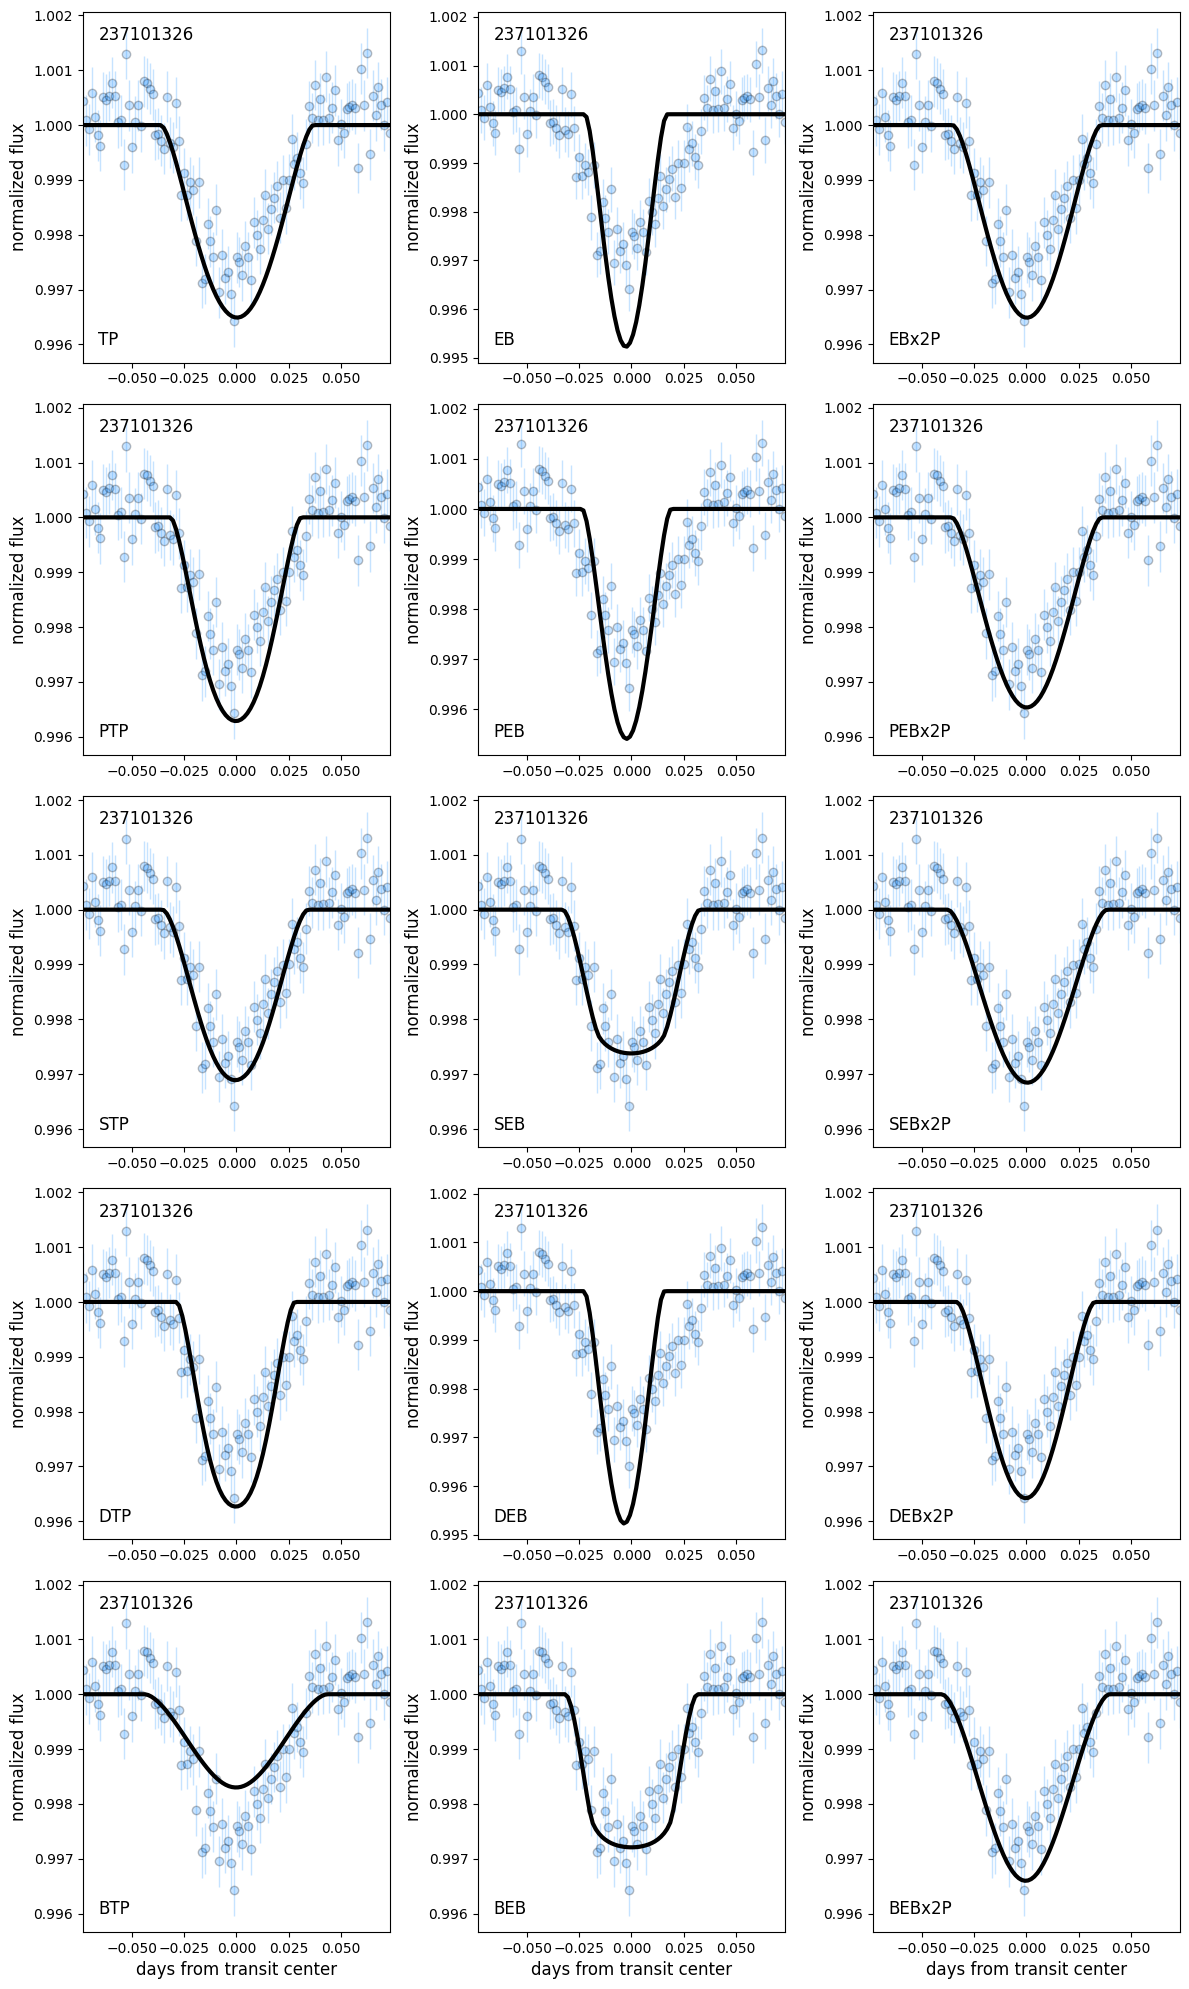

In [51]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err), x_range=[np.min(time), np.max(time)], nrows=0, save=False, fname='TOI-4051_TESS_Data')